### Import benchmark functions

In [1]:
from benchmark.benchmarkFunctions import *
#from algorithms import * 
from alg.BayesianOptimization import bayesian_optimization, history_wrapper
from alg.LatinHypercubeSampling import latin_hypercube
from alg.ParticleSwarmOptimization import particle_swarm
from alg.SobolSampling import sobol
from alg.ResponseSurfaceModeling import response_surface
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# Definition of variables
benchmarkfunction_list = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky] #Hartmann
algorithms_list        = [particle_swarm, bayesian_optimization]

### Benchmark functions

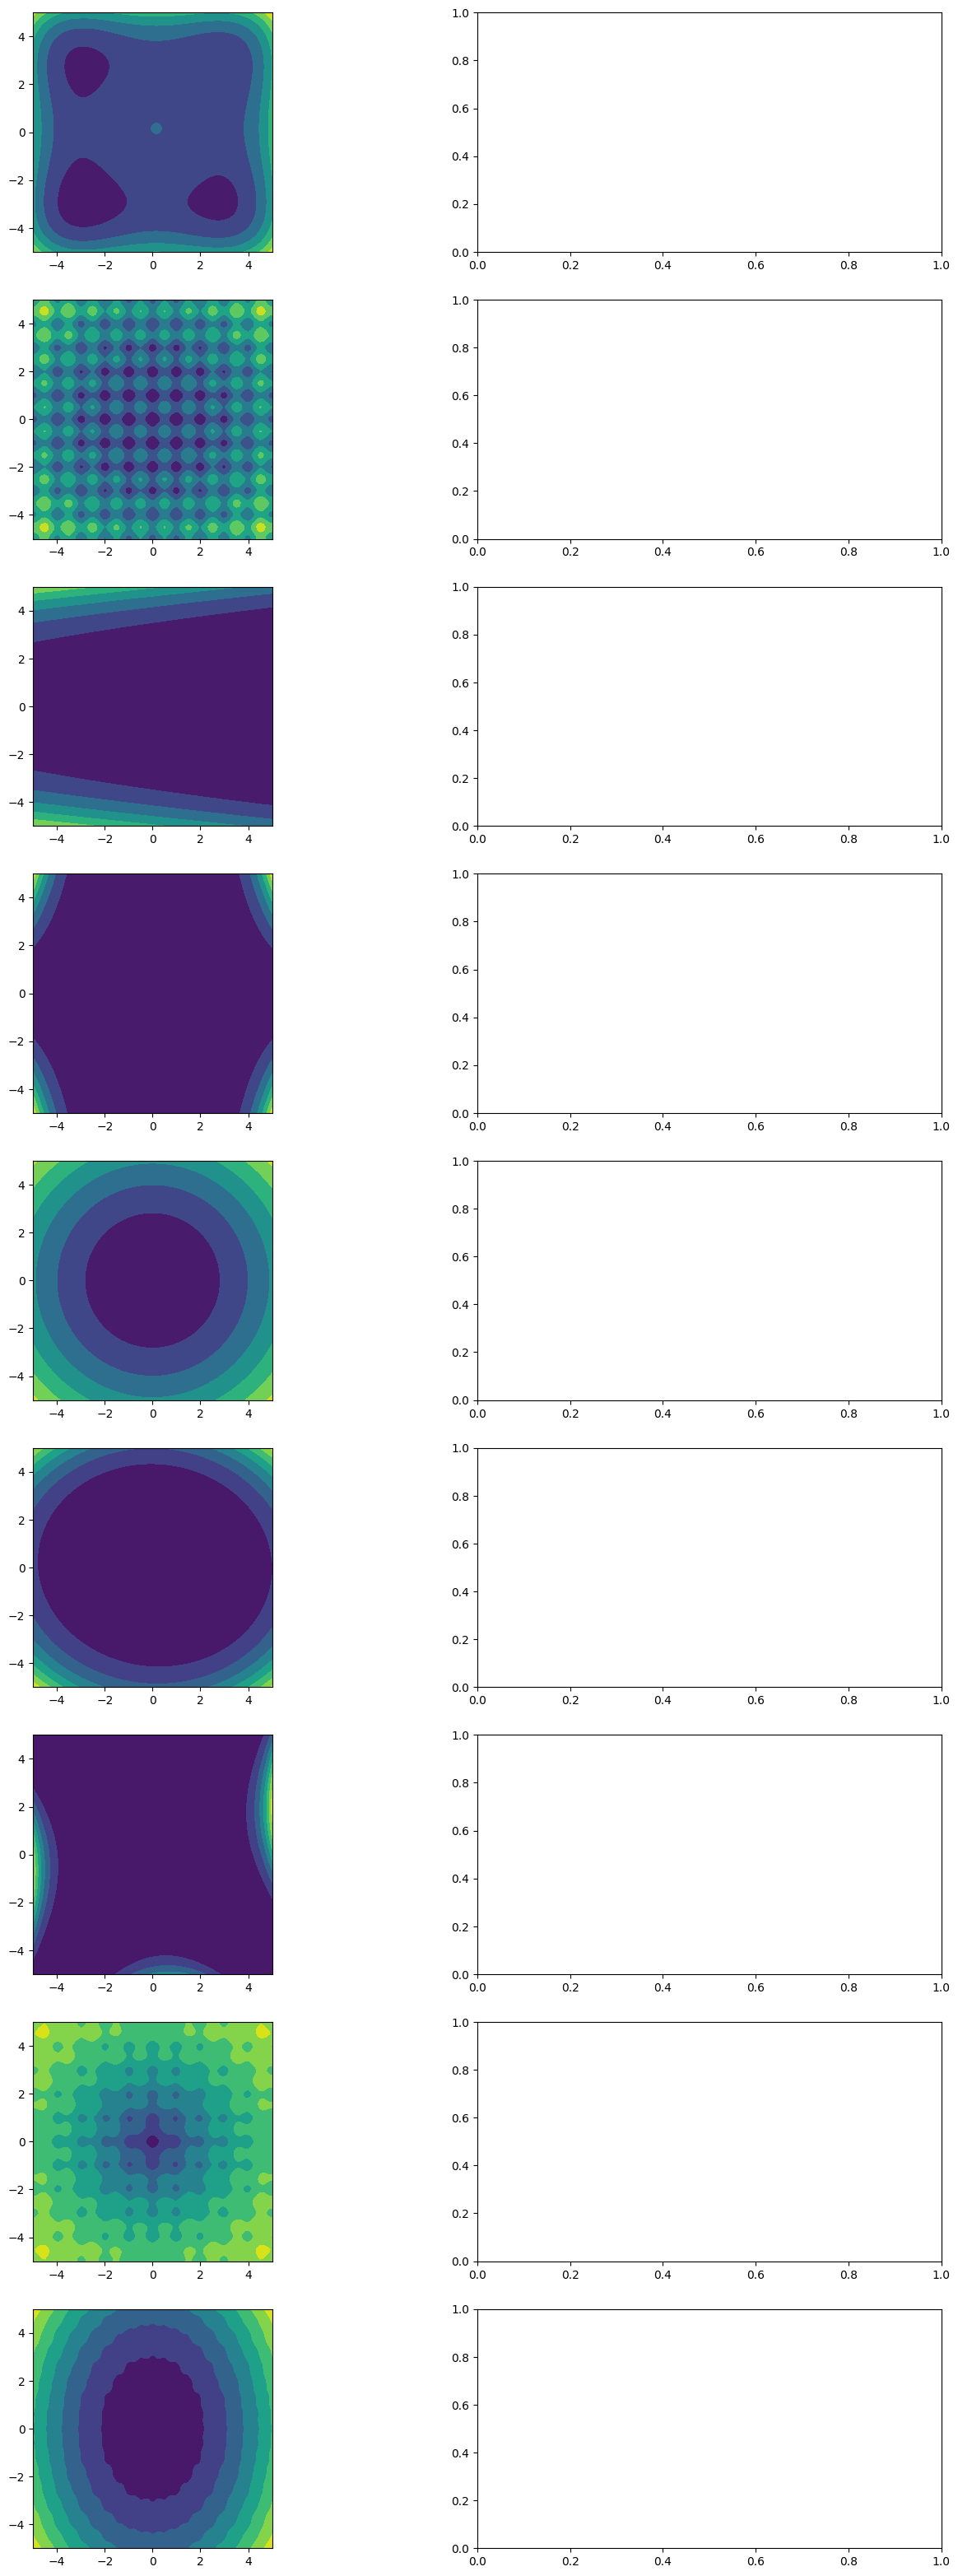

In [7]:
# Define the X1 and X2 span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2]).reshape(-1,2)


fig, ax = plt.subplots(len(benchmarkfunction_list), 2, figsize=(16,40))

for idx, fun in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = fun(points).reshape(101,101)

    ax[idx,0].contourf(X1,X2,Fx)
    ax[idx,0].axis('scaled')

plt.show()


### Bayesian Optimization algorithm

In [6]:
# Define the X and Y span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2]).reshape(-1,2)

# Compute the function
Fx = StybliskiTang(points)

# Find minimum and its coordinates
idx  = np.argmin(Fx)
Xmin = points[idx]

# Set the bounds
bounds = {'X' : (-5,5), 'Y' : (-5,5)}
# Run the optimization algorithm
Xalg, Yalg = bayesian_optimization(StybliskiTang, bounds, 50, 2)

print(f"[MIN function] Minimum in x={Xmin[0]},    y={Xmin[1]}    with f={Fx[idx]}")
print(f"[OPTIMIZATION] Minimum in x={Xalg[-1,0]}, y={Xalg[-1,1]} with f={Yalg[-1]}")



fig, ax = plt.subplots(1, 2, figsize=(16,8))

Fx = Fx.reshape(101,101)
ax[0].contourf(X1,X2,Fx)
ax[0].axis('scaled')
ax[0].scatter(Xalg[:,0], Xalg[:,1], c="red", s=1)
ax[0].scatter(Xalg[0,0], Xalg[0,1], c="blue",s=3)
ax[0].scatter(Xalg[-1,0],Xalg[-1,1],c="orange",s=3)
ax[1].plot(np.arange(0,len(Yalg)), Yalg)
ax[1].set_title("Performances over time")

plt.show()

AttributeError: 'list' object has no attribute 'shape'

### Particle Swarm Optimization (PSO) algorithm

[MIN function] Minimum in x=-2.9,    y=-2.9    with f=[-156.6638]
[OPTIMIZATION] Minimum in x=-2.903534027878178, y=-2.9035340259244053 with f=-156.6646628150857


Text(0.5, 1.0, 'Performances over time')

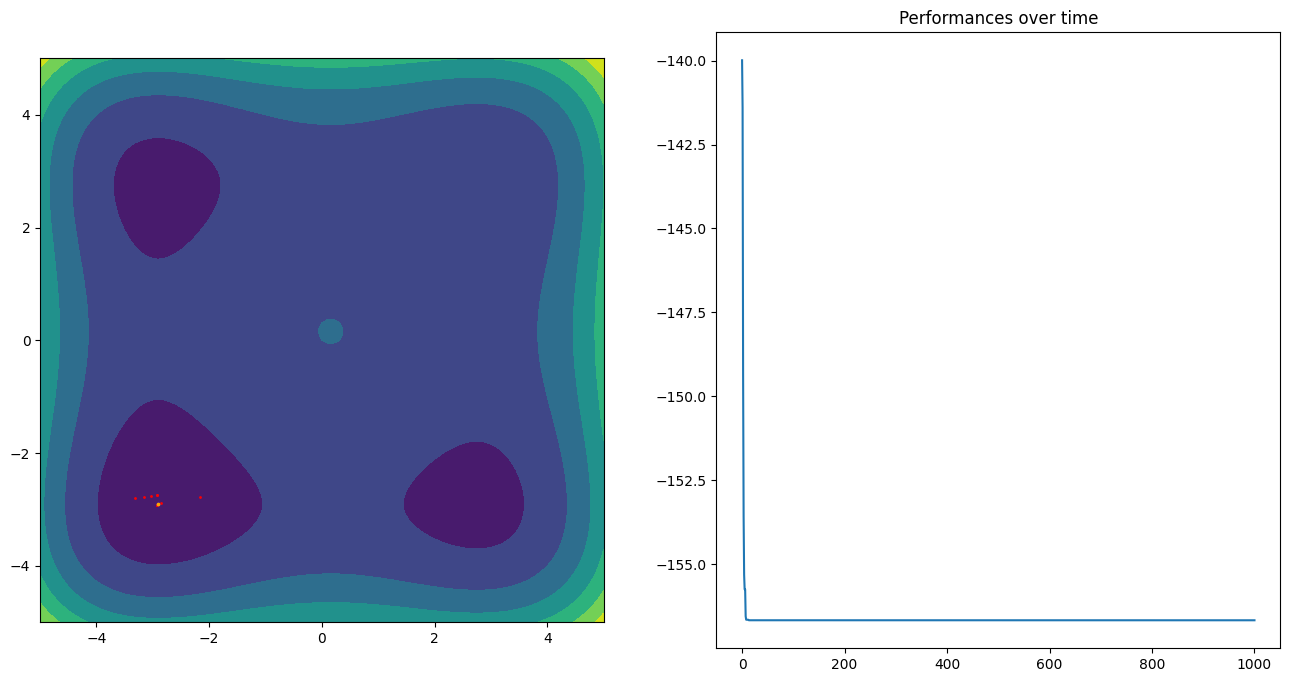

In [2]:
# Define the X and Y span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2]).reshape(-1,2)

# Compute the function
Fx = StybliskiTang(points)

# Find minimum and its coordinates
idx  = np.argmin(Fx)
Xmin = points[idx]

# Run the optimization algorithm
Xalg, Yalg = particle_swarm(StybliskiTang, low=-5, high=5)

print(f"[MIN function] Minimum in x={Xmin[0]},    y={Xmin[1]}    with f={Fx[idx]}")
print(f"[OPTIMIZATION] Minimum in x={Xalg[-1,0]}, y={Xalg[-1,1]} with f={Yalg[-1]}")

fig, ax = plt.subplots(1, 2, figsize=(16,8))

Fx = Fx.reshape(101,101)
ax[0].contourf(X1,X2,Fx)
ax[0].axis('scaled')
ax[0].scatter(Xalg[:,0], Xalg[:,1], c="red", s=1)
ax[0].scatter(Xalg[0,0], Xalg[0,1], c="blue",s=3)
ax[0].scatter(Xalg[-1,0],Xalg[-1,1],c="orange",s=3)
ax[1].plot(np.arange(0,len(Yalg)), Yalg)
ax[1].set_title("Performances over time")


### Nelder Mead algorithm

In [ ]:
# Define the X and Y span
X = np.mgrid[-5:5.1:0.25, -5:5.1:0.25].reshape(2,-1)

# Compute the function
r = StybliskiTang(X)

# Find minimum and its coordinates
idx  = np.argmin(r)
Xmin = X[:,idx]

# Run the optimization algorithm
result, hsr = nelder_mead(StybliskiTang, low=-5, high=5,max_iter=2000)

print(f"[MIN function] Minimum in x={Xmin[0]}, y={Xmin[1]} with f={r[idx]}")
print(f"[OPTIMIZATION] Minimum in x={result[0]}, y={result[1]} with f={StybliskiTang(result)}")

# Show the performance curve
t = np.arange(0,len(hsr))
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, hsr)

plt.show()

### Response Surface Modeling 

Required iterations: 99
[MIN function] Minimum in x=-2.9,    y=-2.9    with f=[-156.6638]
[OPTIMIZATION] Minimum in x=-2.8363074739447116, y=-2.8363074738131786 with f=[-156.35908926]


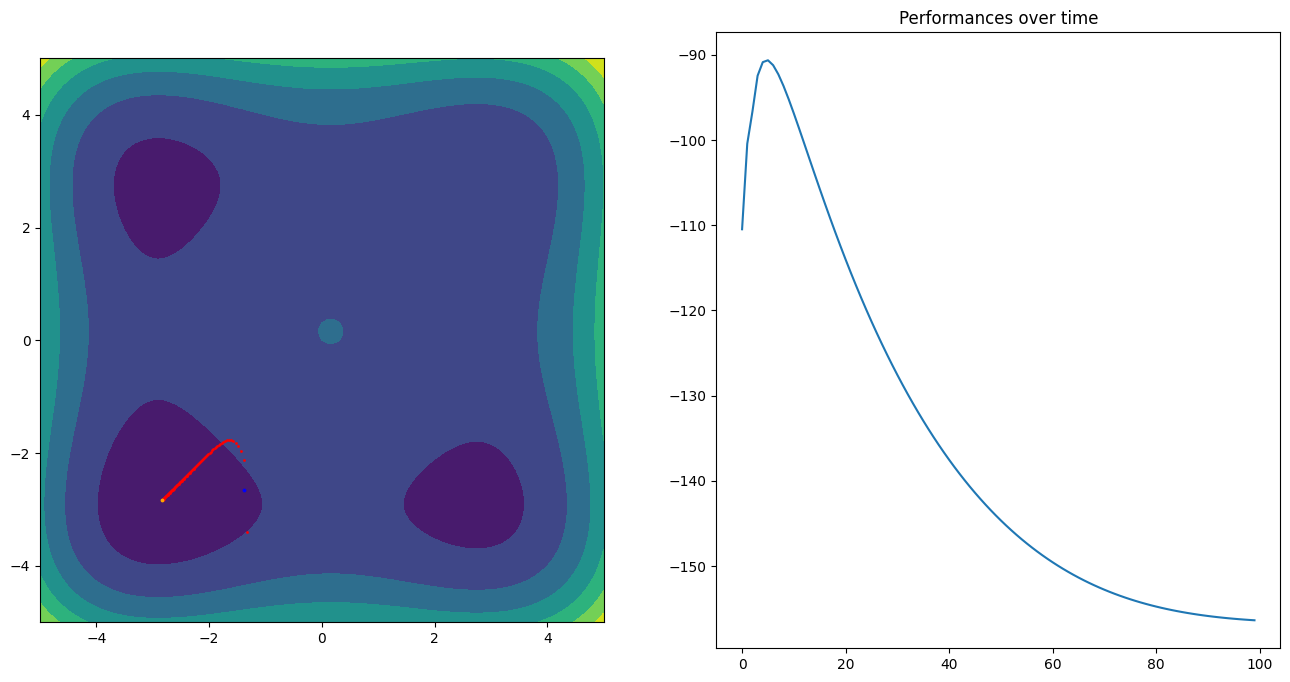

In [3]:
# Define the X and Y span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2]).reshape(-1,2)

# Compute the function
Fx = StybliskiTang(points)

# Find minimum and its coordinates
idx  = np.argmin(Fx)
Xmin = points[idx]

# Run the optimization algorithm
x0 = np.random.uniform(-5,5,size=[1,2])[0]
Xalg, Yalg = response_surface(StybliskiTang, X_new=x0, iterations=100, sampling_bound=[2.5,0.6], sampling_method="central_composite")

print(f"[MIN function] Minimum in x={Xmin[0]},    y={Xmin[1]}    with f={Fx[idx]}")
print(f"[OPTIMIZATION] Minimum in x={Xalg[-1,0]}, y={Xalg[-1,1]} with f={Yalg[-1]}")

fig, ax = plt.subplots(1, 2, figsize=(16,8))

Fx = Fx.reshape(101,101)
ax[0].contourf(X1,X2,Fx)
ax[0].axis('scaled')
ax[0].scatter(Xalg[:,0], Xalg[:,1], c="red", s=1)
ax[0].scatter(Xalg[0,0], Xalg[0,1], c="blue",s=3)
ax[0].scatter(Xalg[-1,0],Xalg[-1,1],c="orange",s=3)
ax[1].plot(np.arange(0,len(Yalg)), Yalg)
ax[1].set_title("Performances over time")

plt.show()

### Sobol Sampling

c:\Users\poselin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


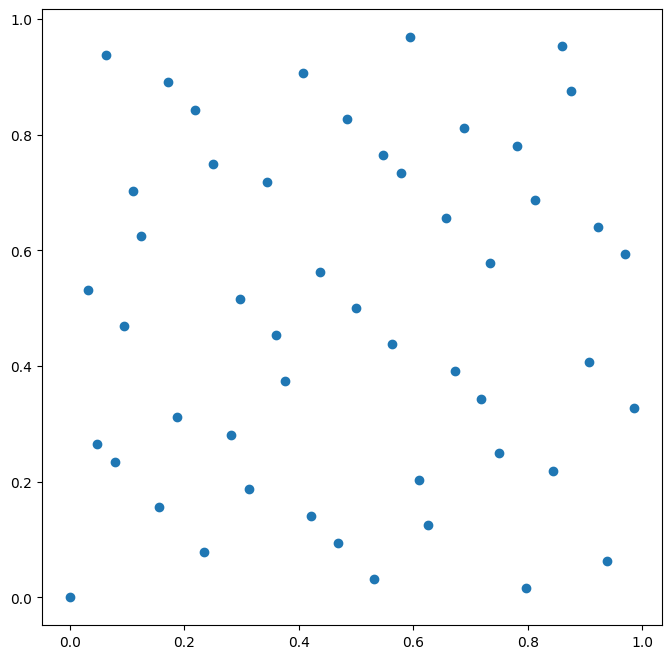

In [4]:
samples = sobol(50, 2, [-5, -5], [5, 5])

samples = np.array(samples)

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(samples[:,0], samples[:,1])


### Latin Hypercube Sampling

In [ ]:
samples = latin_hypercube(50, 2, [-5, -5], [5, 5])

samples = np.array(samples)

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(samples[:,0], samples[:,1])


### Comparison of sampling distribution

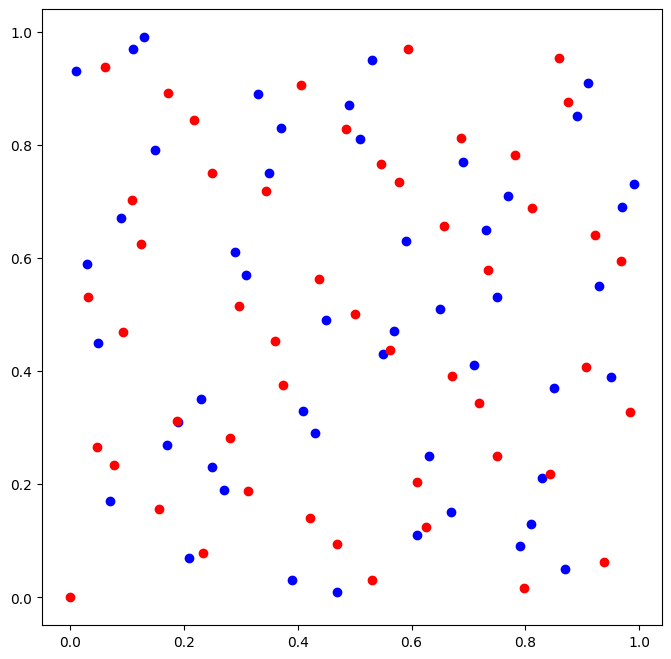

In [5]:
samples_lh = latin_hypercube(50, 2, [-5, -5], [5, 5])
samples_sobol = sobol(50, 2, [-5, -5], [5, 5])

samples_lh = np.array(samples_lh)
samples_sobol = np.array(samples_sobol)

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(samples_lh[:,0], samples_lh[:,1],c="blue")
ax.scatter(samples_sobol[:,0], samples_sobol[:,1],c="red")

### Algorithms performances

In [ ]:
'''
for alg in algorithms_list:

    score = []

    # Run the optimization algorithms and store the best value after 50 iterations
    for fun in benchmarkfunction_list:
        score.append(alg(fun), max_iter=50)

    # Plot the result to compare performances
'''